In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data file
df = pd.read_csv('https://raw.githubusercontent.com/flowertoman/data/main/data02_diabetes.csv')

(442, 11)
        age       sex       bmi       map        tc       ldl       hdl  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

        tch       ltg       glu    Y  
0 -0.002592  0.019908 -0.017646  151  
1 -0.039493 -0.068330 -0.092204   75  
2 -0.002592  0.002864 -0.025930  141  
3  0.034309  0.022692 -0.009362  206  
4 -0.002592 -0.031991 -0.046641  135  
                age           sex           bmi           map            tc  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.642134e-16  1.309912e-16 -8.002648e-16  1.326239e-16 -8.766241e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761

<AxesSubplot:xlabel='bmi', ylabel='Y'>

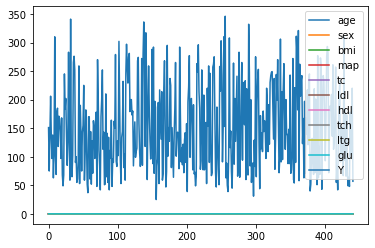

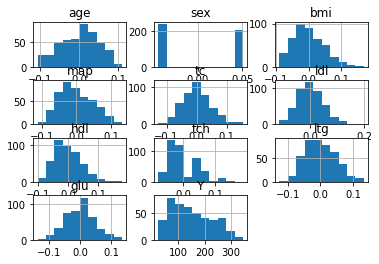

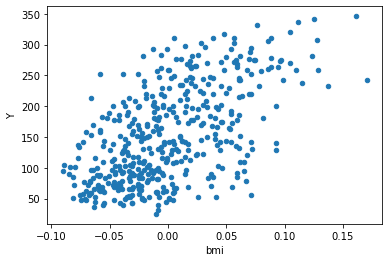

In [3]:
# EDA
print(df.shape)
print(df.head())
df.tail()
print(df.describe())
df.plot()
df.hist()
df.corr()
df.plot("bmi","Y","scatter")

In [4]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


In [22]:
df.corr()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
map,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
tc,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
ltg,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
glu,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [5]:
# Separating traing & test sets
X = df.iloc[:,:-1]
Y = (df['Y'] > 140).factorize()[0]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=1) 

In [6]:
####################################################
# Linear Regression
####################################################

In [11]:
# simple linear regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(xtrain, ytrain)

In [23]:
from sklearn.metrics import mean_squared_error
pred = lr_model.predict(xtest)
mse = mean_squared_error(ytest, pred)
mse

0.3082191780821918

In [8]:
####################################################
# KNN Classifier
####################################################

In [10]:
# simple KNN classification
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(xtrain, ytrain)

In [ ]:
####################################################
# Classification Tree
####################################################

In [18]:
# classification tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier(random_state=1).fit(xtrain, ytrain)
rf_model = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)

In [21]:
from sklearn.metrics import classification_report

pred2 = knn_model.predict(xtest)
print('knn_model classification_report')
print(classification_report(ytest,pred2))

pred3 = dt_model.predict(xtest)
print('decision tree classification_report')
print(classification_report(ytest, pred3))

pred4 = rf_model.predict(xtest)
print('randomforest classification_report')
print(classification_report(ytest, pred4))

knn_model classification_report
              precision    recall  f1-score   support

           0       0.70      0.63      0.66        70
           1       0.69      0.75      0.72        76

    accuracy                           0.69       146
   macro avg       0.69      0.69      0.69       146
weighted avg       0.69      0.69      0.69       146

decision tree classification_report
              precision    recall  f1-score   support

           0       0.64      0.54      0.59        70
           1       0.63      0.72      0.67        76

    accuracy                           0.64       146
   macro avg       0.64      0.63      0.63       146
weighted avg       0.64      0.64      0.63       146

randomforest classification_report
              precision    recall  f1-score   support

           0       0.70      0.63      0.66        70
           1       0.69      0.75      0.72        76

    accuracy                           0.69       146
   macro avg       0.69  